# Estimating nitrogen and phosphorus concentrations in streams and rivers  


<center>Longzhu Shen</center> 
<p>
<center><i>Spatial Ecology</i></center>
<p>
<center>May 2021</center>
    
Exercise base on the: 

**[Estimating nitrogen and phosphorus concentrations in streams and rivers, within a machine learning framework](https://www.nature.com/articles/s41597-020-0478-7)**

Longzhu Q. Shen, Giuseppe Amatulli, Tushar Sethi, Peter Raymond & Sami Domisch  
Scientific Data volume 7, Article number: 161 (2020) Cite this article 

**BackGround**
- Geoenviornmental variables 
- Ground observationd : Nitrogen in US streams  

Lectures: [Machine Learning Optimization](http://spatial-ecology.net/docs/source/lectures/lect_20210506_ML_OPT.pdf)

**Code**

In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor as RFReg
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.pipeline import Pipeline
from scipy.stats.stats import pearsonr
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,6.5)

read in data

In [3]:
dsIn = pd.read_csv("./txt/TN_Data_Sample.csv")
dsIn.head(6)

,sLong,sLat,mean,lu_avg_01,lu_avg_02,lu_avg_03,lu_avg_04,lu_avg_05,lu_avg_06,lu_avg_07,...,hydro_avg_13,hydro_avg_14,hydro_avg_15,hydro_avg_16,hydro_avg_17,hydro_avg_18,hydro_avg_19,dem_avg,slope_ave,lentic_lotic01
0,-123.187500,46.179165,0.566667,28,0,15,45,23,22,12,...,107329616,38819396,29,310689856,136347292,310689856,136347292,1470,492,8
1,-123.129166,45.437500,1.166667,24,0,6,25,0,4,41,...,23143,1529,68,64073,7800,64073,7800,142,291,2
2,-123.120834,45.470833,0.628778,46,0,3,33,0,1,15,...,167329,11217,68,470310,55128,470310,55128,315,353,3
3,-123.120834,45.504166,0.336667,55,0,2,32,0,1,9,...,117497,8462,67,333116,40989,333116,40989,315,441,2
4,-123.054169,45.504166,0.595833,46,0,3,31,0,2,17,...,307267,21228,68,865826,104122,865826,104122,290,363,3
5,-123.012497,45.520832,1.573333,30,0,4,32,0,3,29,...,233499,18441,65,662045,92675,662045,92675,208,248,3


In [3]:
dsIn.columns.values

array(['sLong', 'sLat', 'mean', 'lu_avg_01', 'lu_avg_02', 'lu_avg_03',
       'lu_avg_04', 'lu_avg_05', 'lu_avg_06', 'lu_avg_07', 'lu_avg_08',
       'lu_avg_09', 'lu_avg_10', 'lu_avg_11', 'lu_avg_12', 'prec', 'tmin',
       'tmax', 'soil_avg_01', 'soil_avg_02', 'soil_avg_03', 'soil_avg_04',
       'soil_avg_05', 'soil_avg_06', 'soil_avg_07', 'soil_avg_08',
       'soil_avg_09', 'soil_avg_10', 'hydro_avg_01', 'hydro_avg_02',
       'hydro_avg_03', 'hydro_avg_04', 'hydro_avg_05', 'hydro_avg_06',
       'hydro_avg_07', 'hydro_avg_08', 'hydro_avg_09', 'hydro_avg_10',
       'hydro_avg_11', 'hydro_avg_12', 'hydro_avg_13', 'hydro_avg_14',
       'hydro_avg_15', 'hydro_avg_16', 'hydro_avg_17', 'hydro_avg_18',
       'hydro_avg_19', 'dem_avg', 'slope_ave', 'lentic_lotic01'],
      dtype=object)

In [4]:
feats = ['mean','tmax']

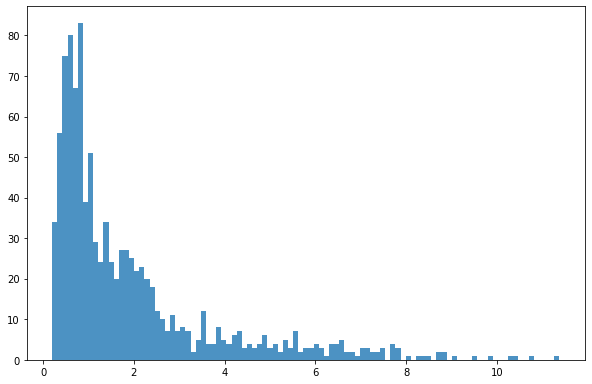

In [14]:
bins = np.linspace(min(dsIn['mean']),max(dsIn['mean']),100)
plt.hist((dsIn['mean']),bins,alpha=0.8);

In [3]:
dsIn['log']=  np.log10(dsIn['mean'])

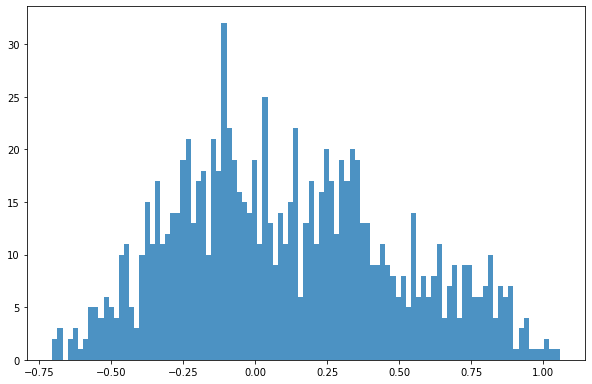

In [16]:
bins = np.linspace(min(dsIn['log']),max(dsIn['log']),100)
plt.hist((dsIn['log']),bins,alpha=0.8);

In [4]:
X = dsIn.iloc[:,3:50].values
Y = dsIn.iloc[:,50:51].values
feat = dsIn.iloc[:,3:50].columns.values

In [4]:
feat

array(['lu_avg_01', 'lu_avg_02', 'lu_avg_03', 'lu_avg_04', 'lu_avg_05',
       'lu_avg_06', 'lu_avg_07', 'lu_avg_08', 'lu_avg_09', 'lu_avg_10',
       'lu_avg_11', 'lu_avg_12', 'prec', 'tmin', 'tmax', 'soil_avg_01',
       'soil_avg_02', 'soil_avg_03', 'soil_avg_04', 'soil_avg_05',
       'soil_avg_06', 'soil_avg_07', 'soil_avg_08', 'soil_avg_09',
       'soil_avg_10', 'hydro_avg_01', 'hydro_avg_02', 'hydro_avg_03',
       'hydro_avg_04', 'hydro_avg_05', 'hydro_avg_06', 'hydro_avg_07',
       'hydro_avg_08', 'hydro_avg_09', 'hydro_avg_10', 'hydro_avg_11',
       'hydro_avg_12', 'hydro_avg_13', 'hydro_avg_14', 'hydro_avg_15',
       'hydro_avg_16', 'hydro_avg_17', 'hydro_avg_18', 'hydro_avg_19',
       'dem_avg', 'slope_ave', 'lentic_lotic01'], dtype=object)

In [7]:
X.shape

(1010, 47)

In [8]:
Y.shape

(1010, 1)

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=24)
y_train = np.ravel(Y_train)
y_test = np.ravel(Y_test)

In [21]:
pipeline = Pipeline([('rf',RFReg())])

parameters = {
        'rf__max_features':("log2","sqrt",0.33),
        'rf__max_samples':(0.5,0.6,0.7),
        'rf__n_estimators':(500,1000,2000),
        'rf__max_depth':(50,100,200)}

grid_search = GridSearchCV(pipeline,parameters,n_jobs=-1,cv=3,scoring='r2',verbose=1)
grid_search.fit(X_train,y_train)


Fitting 3 folds for each of 81 candidates, totalling 243 fits


GridSearchCV(cv=3, estimator=Pipeline(steps=[('rf', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'rf__max_depth': (50, 100, 200),
                         'rf__max_features': ('log2', 'sqrt', 0.33),
                         'rf__max_samples': (0.5, 0.6, 0.7),
                         'rf__n_estimators': (500, 1000, 2000)},
             scoring='r2', verbose=1)

In [22]:
grid_search.best_score_

0.6719812711835207

In [23]:
print ('Best Training score: %0.3f' % grid_search.best_score_)
print ('Optimal parameters:')
best_par = grid_search.best_estimator_.get_params()
for par_name in sorted(parameters.keys()):
    print ('\t%s: %r' % (par_name, best_par[par_name]))


Best Training score: 0.672
Optimal parameters:
	rf__max_depth: 200
	rf__max_features: 0.33
	rf__max_samples: 0.7
	rf__n_estimators: 500


In [10]:
rfReg = RFReg(n_estimators=500,max_features=0.33,max_depth=200,max_samples=0.7,n_jobs=-1,random_state=24)
rfReg.fit(X_train, y_train);
dic_pred = {}
dic_pred['train'] = rfReg.predict(X_train)
dic_pred['test'] = rfReg.predict(X_test)
[pearsonr(dic_pred['train'],y_train)[0],pearsonr(dic_pred['test'],y_test)[0]]

[0.9697515742517621, 0.8061496236451665]

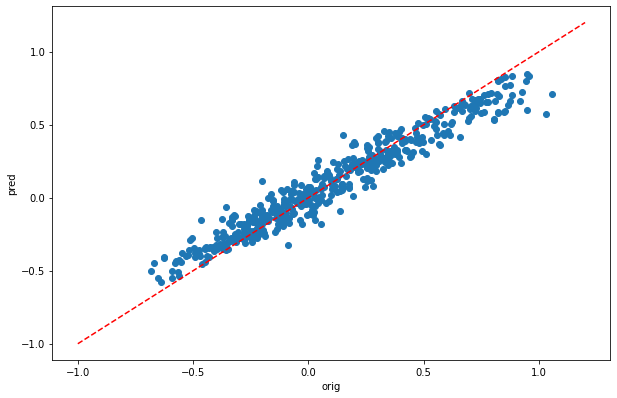

In [28]:
plt.scatter(y_train,dic_pred['train'])
plt.xlabel('orig')
plt.ylabel('pred')
ident = [-1, 1.2]
plt.plot(ident,ident,'r--')

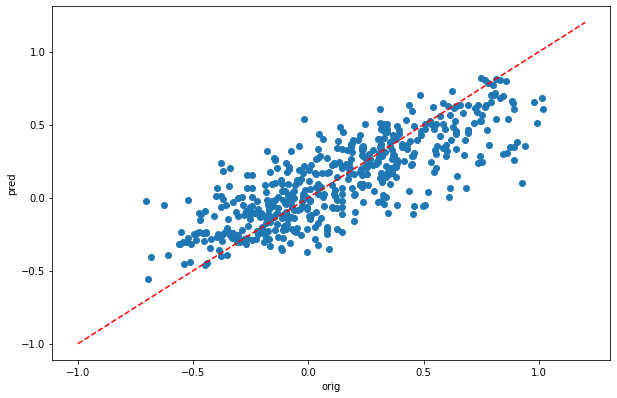

In [29]:
plt.scatter(y_test,dic_pred['test'])
plt.xlabel('orig')
plt.ylabel('pred')
ident = [-1, 1.2]
plt.plot(ident,ident,'r--')

In [11]:
impt = [rfReg.feature_importances_, np.std([tree.feature_importances_ for tree in rfReg.estimators_],axis=1)] 
ind = np.argsort(impt[0])

In [12]:
ind

array([ 9,  7, 10,  1, 23,  4, 46, 12, 37, 40, 36, 42, 41, 38, 43, 20, 24,
       27, 33, 35, 39,  8, 29, 44, 30, 22, 31, 26, 32,  0, 28,  2, 45, 18,
       13, 14, 11, 25, 34,  5,  3,  6, 17, 21, 19, 15, 16])

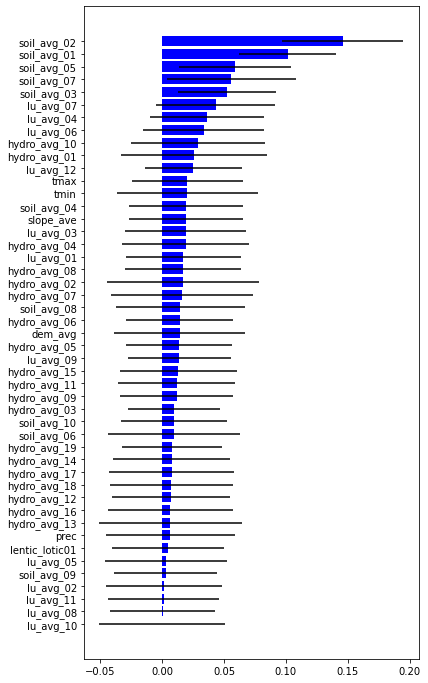

In [15]:
plt.rcParams["figure.figsize"] = (6,12)
plt.barh(range(len(feat)),impt[0][ind],color="b", xerr=impt[1][ind], align="center")
plt.yticks(range(len(feat)),feat[ind]);